<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20Basic%20Image%20Classification%20MNIST%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - Basic Image Classification MNIST Dataset**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.8.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
mnist = keras.datasets.fashion_mnist

**Load the data.**

Load and split dataset in test and training dataset

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
np.max(X_train), np.min(X_train), np.mean(X_train)

(255, 0, 72.94035223214286)

In [8]:
np.max(X_test), np.min(X_test), np.mean(X_test)

(255, 0, 73.14656658163265)

**Defining MNIST dataset category.**

In [9]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

**Data Exploration**

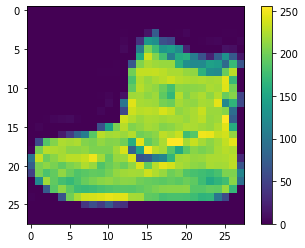

In [10]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

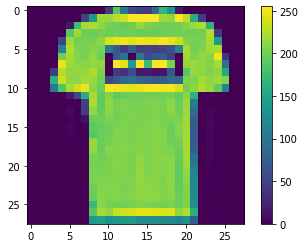

In [11]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

Since the Neural Network takes values between 0 and 1. We need to bring or training data between 0 and 1. To do that we will divide all our training and test data by the max value of the training/test as found above "np.max(X_train)"

In [12]:
X_train = X_train / np.max(X_train)  # 255 is the max value of the training data. nm

In [13]:
X_test = X_test / np.max(X_train)

Now we can see below that we have brought our data between 0 and 1. Look at the bar.

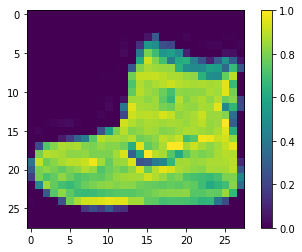

In [14]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

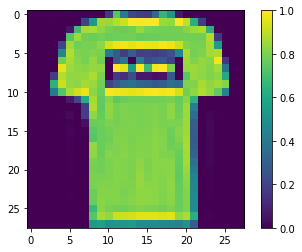

In [15]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

**Build the model with Tensorflow**

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

**Sequential Model**

The most common type of model is the Sequential model, which is a linear stack of layers. You can create a Sequential model by passing a list of layers to the sequential() function

In [17]:
model = Sequential()

# Flatten just converts the data into a single dimension. 28 x 28 is what we have in out training data.
# As you can see above. It will convert 28 x 28 in to a single dimension, which is 784

# Input Layer. Input all data.
model.add(Flatten(input_shape=(28, 28)))  # 28 x 28 = 784

# Hidden layer.
model.add(
    Dense(128, activation="relu")
)  # 128 is no of layers. (784 + 1) x 128 = 100480

# Output Layer. Ouput no of layers is expected different outcome -1. Here it is 11 - 1 = 10
model.add(Dense(10, activation="softmax"))  # (128 + 1) x 10 = 1290.

# Total
# 100480 + 1290 = 101770

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Compile Model**

Few important things for compiling the model:
1) Define Loss Function - Minimizes the error during the training

2) Optimizer - Optimizes the model

3) Metrices - Generate information

In [19]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

**Training the model**

In [20]:
# epoch - No of times it will train the dataset on this model.
# validation_split - Only given percent will be used for validation accuracy and validation loss.
history = model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_split=0.2)

# history is used below to plot learning curve and confusion matrix

Epoch 1/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.4970 - accuracy: 0.8214 - val_loss: 0.3944 - val_accuracy: 0.8602
Epoch 2/10
4800/4800 [==============================] - 12s 3ms/step - loss: 0.3764 - accuracy: 0.8607 - val_loss: 0.3655 - val_accuracy: 0.8686
Epoch 3/10
4800/4800 [==============================] - 13s 3ms/step - loss: 0.3387 - accuracy: 0.8762 - val_loss: 0.3587 - val_accuracy: 0.8688
Epoch 4/10
4800/4800 [==============================] - 14s 3ms/step - loss: 0.3168 - accuracy: 0.8832 - val_loss: 0.3511 - val_accuracy: 0.8777
Epoch 5/10
4800/4800 [==============================] - 13s 3ms/step - loss: 0.2976 - accuracy: 0.8908 - val_loss: 0.3320 - val_accuracy: 0.8790
Epoch 6/10
4800/4800 [==============================] - 13s 3ms/step - loss: 0.2837 - accuracy: 0.8945 - val_loss: 0.3469 - val_accuracy: 0.8766
Epoch 7/10
4800/4800 [==============================] - 13s 3ms/step - loss: 0.2683 - accuracy: 0.8995 - val_loss: 0.3440 - val_ac

**Evaluate the accuracy**

Here we will see that the accuracy of the model during training was 0.9109, above, but it was less during the testing, below. This shows the overfitting of the model.

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 77.9136 - accuracy: 0.8511
77.91361236572266
0.8511000275611877


In [26]:
pred = model.predict(X_test)

In [27]:
pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [29]:
np.argmax(pred[0])

9

In [30]:
np.argmax(pred[1])

2

**Plotting Learning Curve**

Install mlxtend using 
- conda install --name tensorflow20 -c conda-forge mlxtend

In [31]:
help(model)

Help on Sequential in module keras.engine.sequential object:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequenti

In [32]:
history.history

{'accuracy': [0.8213750123977661,
  0.8607083559036255,
  0.8762083053588867,
  0.883187472820282,
  0.890791654586792,
  0.8944583535194397,
  0.8995000123977661,
  0.9032708406448364,
  0.9051250219345093,
  0.909375011920929],
 'loss': [0.49696362018585205,
  0.3763921856880188,
  0.3387308418750763,
  0.3167855143547058,
  0.2976021468639374,
  0.28374552726745605,
  0.26834362745285034,
  0.26018285751342773,
  0.24864201247692108,
  0.24164114892482758],
 'val_accuracy': [0.8601666688919067,
  0.8685833215713501,
  0.8688333630561829,
  0.8776666522026062,
  0.8790000081062317,
  0.8765833377838135,
  0.8801666498184204,
  0.8835833072662354,
  0.8838333487510681,
  0.8858333230018616],
 'val_loss': [0.3944215476512909,
  0.36546358466148376,
  0.35869458317756653,
  0.35105037689208984,
  0.33201444149017334,
  0.3469325006008148,
  0.3440174162387848,
  0.325324684381485,
  0.3301360607147217,
  0.32906636595726013]}

In [33]:
import matplotlib.pyplot as plt

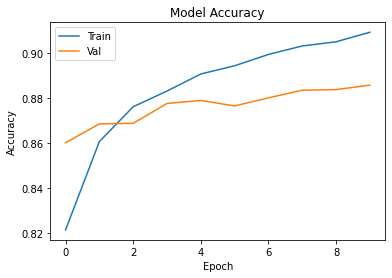

In [34]:
# Plot training and validation accuracy values
# Train vs Test
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

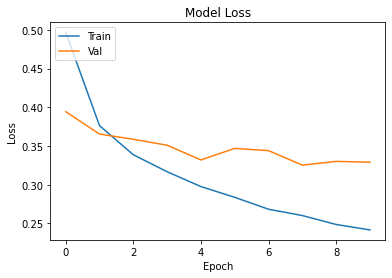

In [35]:
# Plot training and validation loss values
# Train vs Test
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()